<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from js import fetch
import io

#### Read the dataset in the csv file from the URL


In [3]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot

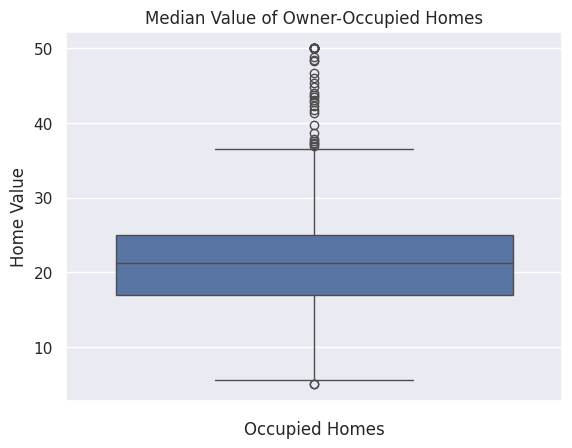

In [42]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Median Value of Owner-Occupied Homes')
ax.set_ylabel('Home Value')
ax.set_xlabel('Occupied Homes')
plt.show()

#### Task 2.2: Provide a bar plot for the Charles river variable

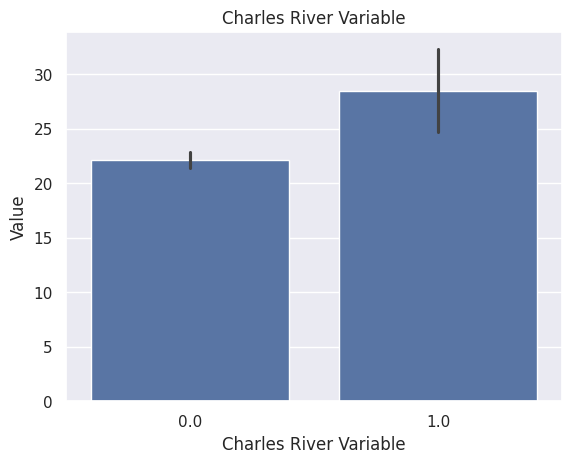

In [40]:
sns.set()
ax = sns.barplot(y= 'MEDV',x="CHAS", data=boston_df)
ax.set_title('Charles River Variable')
ax.set_ylabel('Value')
ax.set_xlabel('Charles River Variable')
plt.show()

#### Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

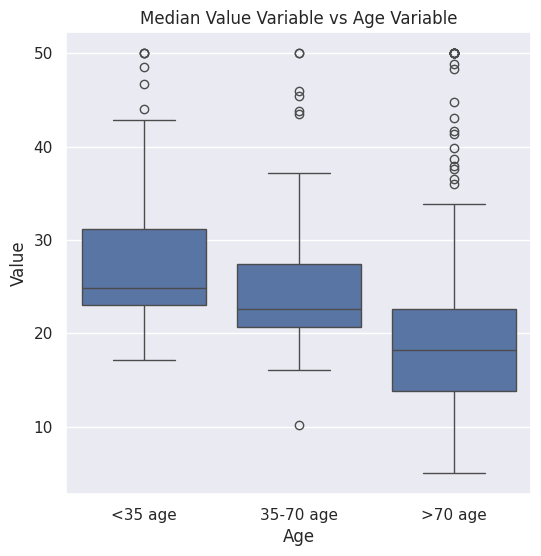

In [43]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['<35 age', '35-70 age', '>70 age'])
plt.figure(figsize=(6, 6))
ax = sns.boxplot(y='MEDV', x='AGE_group', data=boston_df)
ax.set_title('Median Value Variable vs Age Variable')
ax.set_ylabel('Value')
ax.set_xlabel('Age')
plt.show()

#### Task 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

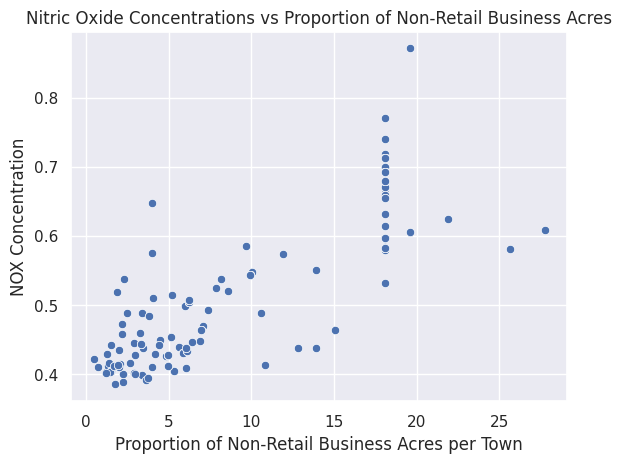

In [44]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres')
ax.set_ylabel('NOX Concentration')
ax.set_xlabel('Proportion of Non-Retail Business Acres per Town')
plt.show()

The scatterplot above shows a positive relationship between the Nitric oxide concentrations and The proportion of non-retail business acres per town.

#### Task 2.5: Create a histogram for the pupil to teacher ratio variable

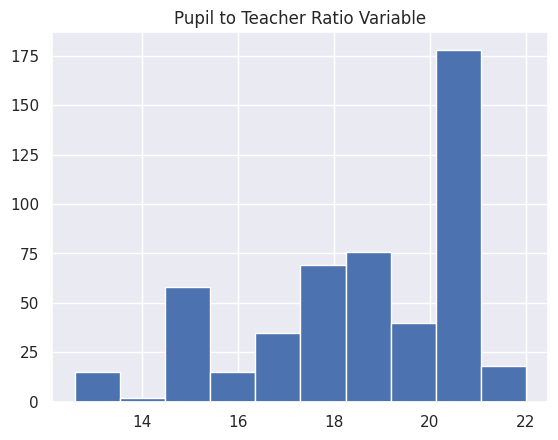

In [45]:
plt.hist(boston_df['PTRATIO'])
plt.title('Pupil to Teacher Ratio Variable')
plt.show()

#### Task 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in MEDV between the houses bounded by Charles river and NOT")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in MEDV between the houses bounded by Charles river and NOT")


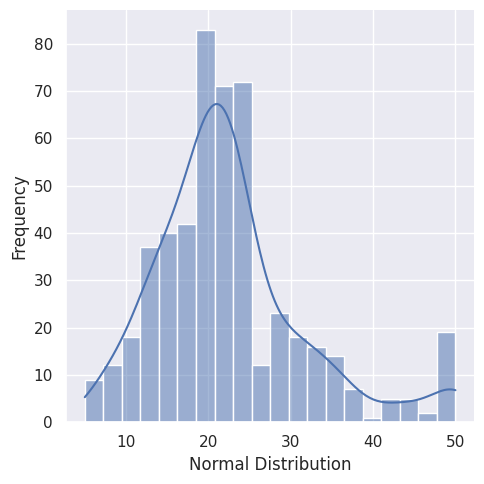

In [47]:
ax = sns.displot(boston_df['MEDV'],bins=20, kde=True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

We can use the Levene's Test in Python to check test significance

In [48]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [49]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in MEDV based on whether it is bounded by CHARLES river or NOT.

#### Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [51]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<35 age'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70 age'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '>70 age'

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [53]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '<35 age']['MEDV'],
                   boston_df[boston_df['age_group'] == '35-70 age']['MEDV'], 
                   boston_df[boston_df['age_group'] == '>70 age']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [54]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '<35 age']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == '35-70 age']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '>70 age']['MEDV']

In [55]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### Task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

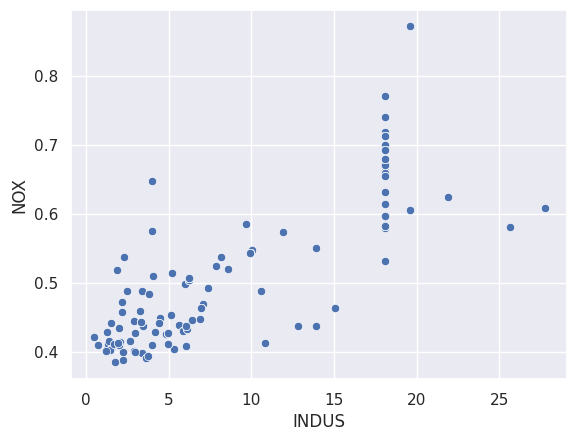

In [56]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [57]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

#### Task 3.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

*   $H\_0: β1$ = 0 (Weighted distances to five Boston employment centres has no effect on Median value of owner-occupied homes)
*   $H\_1: β1$ is not equal to 0 (Weighted distances to five Boston employment centres has an effect on Median value of owner-occupied homes)

In [59]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        00:03:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is an effect on Median value of owner-occupied homes based on weighted distances to five Boston employment centres. The coefficient 1.0916 means that more weighted distances to five Boston employment centres (DIS) has more 1.0916 median value of owner occupied homes.